#### AR - Academic Reputation
#### ER - Employement Reputation
#### FSR - Faculty and Student Ratio
#### CPF - Citation per Faculty
#### IFR - International Faculty
#### ISR - International Student Ratio
#### IRN - International Research Network
#### GER - Employement Outcome
#### Rank - Overall University Rank¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import iplot
from sklearn.model_selection import train_test_split

In [2]:
%ls


 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\Kaggle projects\1-World Un�versity Ranking

19.08.2022  11:31    <DIR>          .
19.08.2022  11:31    <DIR>          ..
18.08.2022  16:07    <DIR>          .ipynb_checkpoints
18.08.2022  16:04           173.843 2023 QS World University Rankings.csv
19.08.2022  11:31         6.388.003 Untitled.ipynb
               2 File(s)      6.561.846 bytes
               3 Dir(s)  54.108.184.576 bytes free


In [3]:
df=pd.read_csv('2023 QS World University Rankings.csv')

In [4]:
df.head()

Rank                                   institution location code  \
0     1  Massachusetts Institute of Technology (MIT)             US   
1     2                       University of Cambridge            UK   
2     3                           Stanford University            US   
3     4                          University of Oxford            UK   
4     5                            Harvard University            US   

         location  ar score ar rank  er score er rank  fsr score fsr rank  \
0   United States     100.0       5     100.0       4      100.0       14   
1  United Kingdom     100.0       2     100.0       2      100.0       11   
2   United States     100.0       4     100.0       5      100.0        6   
3  United Kingdom     100.0       3     100.0       3      100.0        8   
4   United States     100.0       1     100.0       1       99.4       35   

   ...  cpf rank ifr score  ifr rank isr score  isr rank irn score  irn rank  \
0  ...         5     100.0        54      90.0       109      96.1        58   
1  ...        55     100.0        60      96.3        70      99.5         6   
2  ...         9      99.8        74      60.3       235      96.3        55   
3  ...        64      98.8       101      98.4        54      99.9         3   
4  ...         2      76.9       228      66.9       212     100.0         1   

  ger score  ger rank score scaled  
0     100.0         3          100  
1     100.0         9         98.8  
2     100.0         2         98.5  
3     100.0         7         98.4  
4     100.0         1         97.6  

[5 rows x 21 columns]

In [5]:
df.duplicated().any()

False

In [6]:
#% of missing values
for feature in df:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

Rank has 0.0 % missing values
institution has 0.0 % missing values
location code has 0.0 % missing values
location has 0.0 % missing values
ar score has 0.0 % missing values
ar rank has 0.0 % missing values
er score has 0.0703 % missing values
er rank has 0.0 % missing values
fsr score has 0.1406 % missing values
fsr rank has 0.0 % missing values
cpf score has 0.3516 % missing values
cpf rank has 0.0 % missing values
ifr score has 6.8917 % missing values
ifr rank has 6.8917 % missing values
isr score has 4.0084 % missing values
isr rank has 4.0084 % missing values
irn score has 0.9142 % missing values
irn rank has 0.9142 % missing values
ger score has 0.8439 % missing values
ger rank has 0.8439 % missing values
score scaled has 0.0 % missing values


In [7]:
df.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
ar rank           0
er score          1
er rank           0
fsr score         2
fsr rank          0
cpf score         5
cpf rank          0
ifr score        98
ifr rank         98
isr score        57
isr rank         57
irn score        13
irn rank         13
ger score        12
ger rank         12
score scaled      0
dtype: int64

In [8]:
ans = pd.DataFrame()
ans['Count'] = df.groupby('location')['location'].count().sort_values(ascending=False)
ans = ans.reset_index()
ans['location code'] = df['location code']
ans

location  Count location code
0      United States    201            US
1     United Kingdom     90            UK
2   China (Mainland)     71            US
3              Japan     50            UK
4             Russia     48            US
..               ...    ...           ...
95       Puerto Rico      1            UK
96             Qatar      1            UK
97             Ghana      1            IE
98           Georgia      1            KR
99        Kyrgyzstan      1            US

[100 rows x 3 columns]

In [9]:
ans[ans['location']=='Turkey']

location  Count location code
20   Turkey     24            HK

[Text(0, 0, '201'),
 Text(0, 0, '90'),
 Text(0, 0, '71'),
 Text(0, 0, '50'),
 Text(0, 0, '48'),
 Text(0, 0, '46'),
 Text(0, 0, '41'),
 Text(0, 0, '41'),
 Text(0, 0, '41'),
 Text(0, 0, '38'),
 Text(0, 0, '35'),
 Text(0, 0, '32'),
 Text(0, 0, '32'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '22'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 

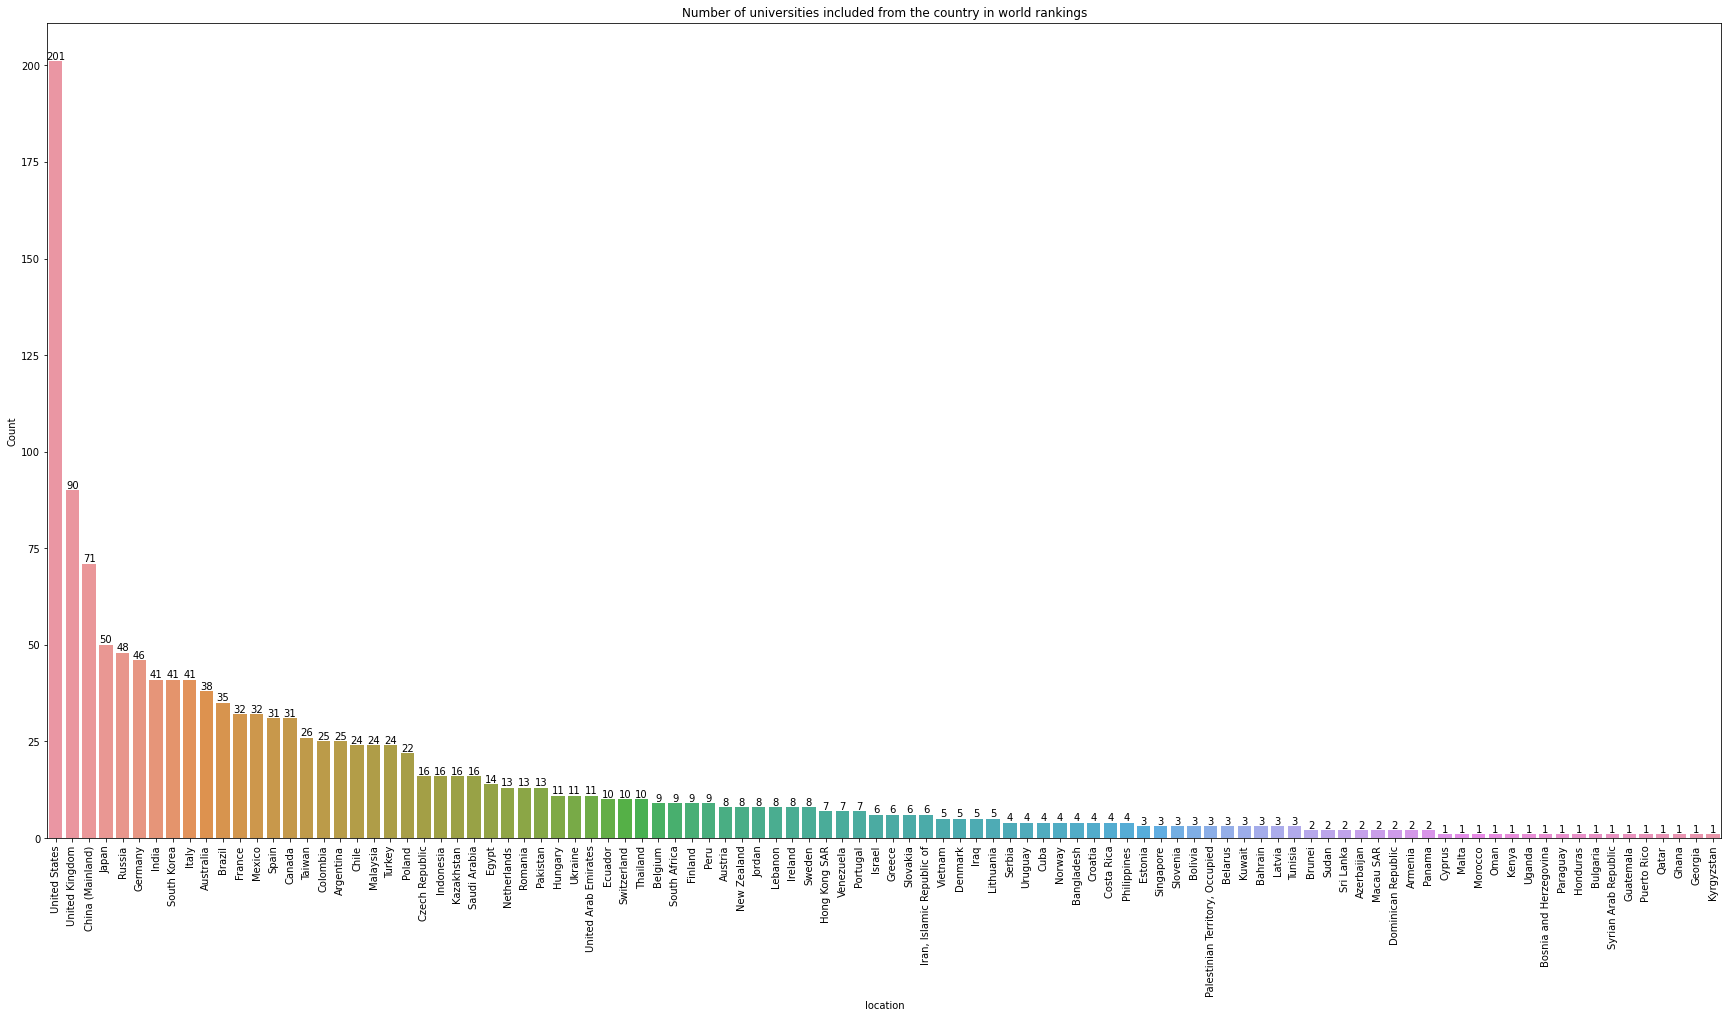

In [10]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='location', y='Count',data=ans)
ax.bar_label(ax.containers[0])

[Text(0, 0, '23.6667'),
 Text(0, 0, '17.4706'),
 Text(0, 0, '22.6667'),
 Text(0, 0, '29.5'),
 Text(0, 0, '15'),
 Text(0, 0, '10'),
 Text(0, 0, '7.2'),
 Text(0, 0, '7.5'),
 Text(0, 0, '5.16667'),
 Text(0, 0, '7.42857'),
 Text(0, 0, '9.33333'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

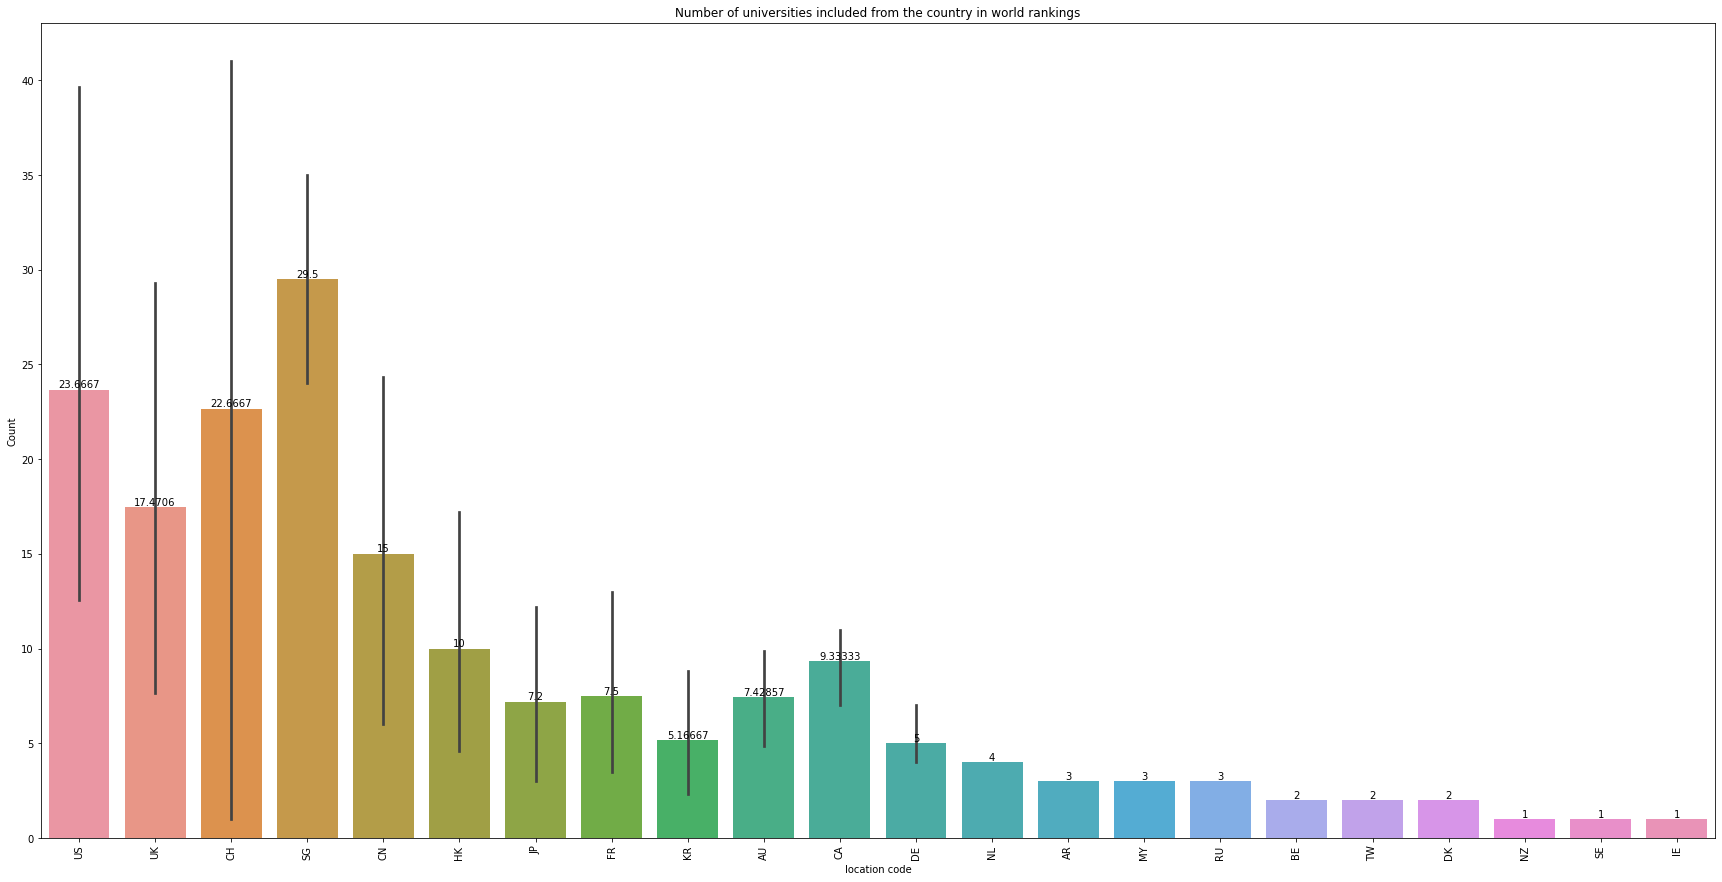

In [11]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='location code', y= 'Count',data=ans)
ax.bar_label(ax.containers[0])

C:\Users\Ahmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Count', ylabel='Density'>

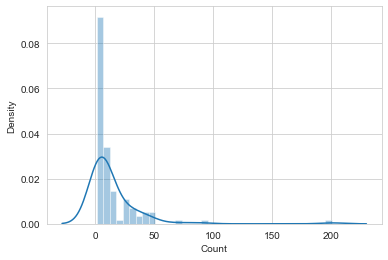

In [12]:
sns.set_style(style='whitegrid')
sns.distplot(ans['Count'])

C:\Users\Ahmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



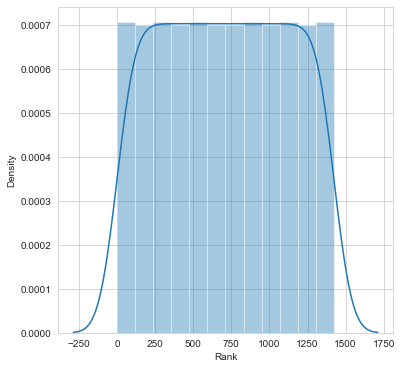

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(df['Rank'])
plt.show()

In [14]:
import plotly.express as px

fig = px.choropleth(ans, locations='location',locationmode="country names",scope="world",color="Count",color_continuous_scale="Viridis_r")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},coloraxis_colorbar=dict(
      title="Total numbers",
#     thicknessmode="pixels",
#     lenmode="pixels",
#     yanchor="top",y=1,
    ticks="outside",
    tickvals=[20,50,80,110,140,170,200],
    dtick=7
))
fig.show()

In [15]:
fig = px.bar(ans, x='location', y='Count',
             hover_data=['location', 'Count'], color='Count',
             labels={'pop':'Count'}, height=1000)
fig.show()

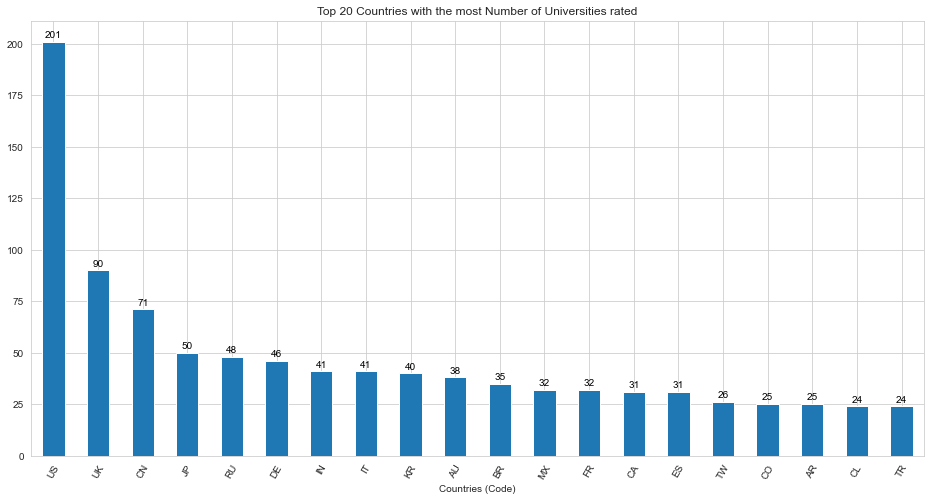

In [16]:
#plot countries with number of universities rated
plt.figure(figsize=(16,8))
code_order = df['location code'].value_counts().sort_values(ascending=False)[:20]
df['location code'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Top 20 Countries with the most Number of Universities rated')
plt.xlabel('Countries (Code)')
#plt.ylabel('Number of University')
#get the current tick location and labels
locs, labels = plt.xticks(rotation=60)
for loc, label in zip(locs,labels):
    
    # get the text property for the label to get the correct count
    count = code_order[label.get_text()]
    
    #convert count into % e.g 109 = 109*100/n_pokemon
    pct_string = '{}'.format(count)
 
    #print on the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')

In [17]:
df.head()

Rank                                   institution location code  \
0     1  Massachusetts Institute of Technology (MIT)             US   
1     2                       University of Cambridge            UK   
2     3                           Stanford University            US   
3     4                          University of Oxford            UK   
4     5                            Harvard University            US   

         location  ar score ar rank  er score er rank  fsr score fsr rank  \
0   United States     100.0       5     100.0       4      100.0       14   
1  United Kingdom     100.0       2     100.0       2      100.0       11   
2   United States     100.0       4     100.0       5      100.0        6   
3  United Kingdom     100.0       3     100.0       3      100.0        8   
4   United States     100.0       1     100.0       1       99.4       35   

   ...  cpf rank ifr score  ifr rank isr score  isr rank irn score  irn rank  \
0  ...         5     100.0        54      90.0       109      96.1        58   
1  ...        55     100.0        60      96.3        70      99.5         6   
2  ...         9      99.8        74      60.3       235      96.3        55   
3  ...        64      98.8       101      98.4        54      99.9         3   
4  ...         2      76.9       228      66.9       212     100.0         1   

  ger score  ger rank score scaled  
0     100.0         3          100  
1     100.0         9         98.8  
2     100.0         2         98.5  
3     100.0         7         98.4  
4     100.0         1         97.6  

[5 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [19]:
df_Turkey = df[df['location']=='Turkey']
df_Turkey

Rank                              institution location code location  \
477    478                           Koç University            TR   Turkey   
504    505         Middle East Technical University            TR   Turkey   
535    536                       Sabanci University            TR   Turkey   
565    566                       Bilkent University            TR   Turkey   
609    610            Istanbul Technical University            TR   Turkey   
704    705                      Boğaziçi University            TR   Turkey   
837    838                    Hacettepe University             TR   Turkey   
844    845                      Istanbul University            TR   Turkey   
1014  1015                      Ankara Üniversitesi            TR   Turkey   
1047  1048                        Gazi Üniversitesi            TR   Turkey   
1053  1054              Istanbul Aydin University              TR   Turkey   
1203  1204              Yildiz Technical University            TR   Turkey   
1205  1206                     Akdeniz Üniversitesi            TR   Turkey   
1209  1210                       Anadolu University            TR   Turkey   
1221  1222                 Dokuz Eylül Üniversitesi            TR   Turkey   
1222  1223                           EGE UNIVERSITY            TR   Turkey   
1227  1228  Gebze Yüksek Teknoloji Enstitüsü (GYTE)            TR   Turkey   
1238  1239              Istanbul Bilgi Üniversitesi            TR   Turkey   
1239  1240   Izmir Institute of Technology (IZTECH)            TR   Turkey   
1247  1248                       Marmara University            TR   Turkey   
1402  1403                       Ataturk University            TR   Turkey   
1404  1405                      Cukurova University            TR   Turkey   
1406  1407                     Erciyes Üniversitesi            TR   Turkey   
1408  1409                       Sakarya University            TR   Turkey   

      ar score ar rank  er score er rank  fsr score fsr rank  ...  cpf rank  \
477       20.4     411      36.3     265       31.2      497  ...       511   
504       26.8     318      52.7     157        8.5     601+  ...       492   
535       16.2    501+      27.4     350       37.0      420  ...       580   
565       20.2     417      34.1     287       16.2     601+  ...      601+   
609       21.9     377      49.1     180       15.0     601+  ...      601+   
704       21.0     398      47.1     200        4.4     601+  ...      601+   
837       18.0     480      18.8     483        8.6     601+  ...      601+   
844       24.6     345      15.2    501+        3.1     601+  ...      601+   
1014      16.6    501+      10.8    501+       10.3     601+  ...      601+   
1047      13.7    501+      10.1    501+        5.1     601+  ...      601+   
1053       3.1    501+       2.9    501+       13.3     601+  ...      601+   
1203       6.7    501+      15.0    501+        6.7     601+  ...      601+   
1205       4.3    501+       3.5    501+        3.8     601+  ...      601+   
1209       3.2    501+       4.7    501+       15.5     601+  ...      601+   
1221       4.4    501+       5.6    501+        2.7     601+  ...      601+   
1222       6.9    501+       9.9    501+       12.3     601+  ...      601+   
1227       2.7    501+       1.6    501+       13.7     601+  ...      601+   
1238       3.5    501+       5.3    501+       16.0     601+  ...      601+   
1239       5.1    501+       2.3    501+        5.7     601+  ...      601+   
1247       5.2    501+       5.1    501+        6.3     601+  ...      601+   
1402       3.5    501+       1.9    501+        3.1     601+  ...      601+   
1404       3.4    501+       2.0    501+        4.0     601+  ...      601+   
1406       2.9    501+       2.0    501+        2.1     601+  ...      601+   
1408       2.9    501+       3.0    501+        2.4     601+  ...      601+   

     ifr score  ifr rank isr score  isr rank irn score  irn rank ger score  \
4

In [20]:
df_Turkey[:5]

Rank                       institution location code location  ar score  \
477   478                    Koç University            TR   Turkey      20.4   
504   505  Middle East Technical University            TR   Turkey      26.8   
535   536                Sabanci University            TR   Turkey      16.2   
565   566                Bilkent University            TR   Turkey      20.2   
609   610     Istanbul Technical University            TR   Turkey      21.9   

    ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
477     411      36.3     265       31.2      497  ...       511      30.3   
504     318      52.7     157        8.5     601+  ...       492      10.7   
535    501+      27.4     350       37.0      420  ...       580      40.5   
565     417      34.1     287       16.2     601+  ...      601+      64.2   
609     377      49.1     180       15.0     601+  ...      601+       4.8   

     ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
477       472      10.6      601+      42.6      601+      24.0       507   
504      601+      14.7      601+      58.5       585      30.1       415   
535       402      17.0       582      24.3      601+      46.9       269   
565       288       8.9      601+      31.7      601+      37.3       349   
609      601+      18.9       553      66.7       496      25.0       489   

    score scaled  
477         24.9  
504            -  
535            -  
565            -  
609            -  

[5 rows x 21 columns]

In [21]:
df_Turkey['ar rank'].unique()

array(['411', '318', '501+', '417', '377', '398', '480', '345'],
      dtype=object)

In [22]:
df['score scaled'].unique()

array(['100', '98.8', '98.5', '98.4', '97.6', '97', '95', '93.6', '93.2',
       '92.7', '91.3', '90.6', '90.1', '89.5', '89.2', '89', '88.4',
       '87.2', '87', '86.7', '85.3', '85.1', '84.4', '83.8', '82.7',
       '82.3', '82.2', '82.1', '81.9', '81.8', '81.6', '81.5', '81.4',
       '81.2', '80.6', '80.3', '79.8', '79.6', '79.3', '78.7', '78',
       '77.4', '77', '76.8', '76.4', '74.8', '74.6', '74.5', '73.6',
       '72.5', '72.3', '71.6', '71.1', '70.4', '70.1', '70', '69.6',
       '69.1', '69', '68.9', '68.2', '68.1', '67.9', '67.7', '67.4', '67',
       '66.9', '66.8', '66', '65.7', '65', '64.9', '64.7', '64.6', '64.1',
       '63.7', '63.6', '62.8', '62.7', '62.3', '62.1', '61.7', '61.1',
       '60.9', '60.8', '60.7', '60.1', '59.5', '59.1', '58.9', '58.8',
       '58.7', '58.2', '58', '57.8', '57.2', '57', '56.9', '56.6', '56.3',
       '56.2', '56.1', '55.9', '55.8', '55.7', '54.9', '54.8', '54.7',
       '54.6', '54.5', '54.3', '54.2', '54.1', '53.9', '53.7', '53.5',
 

In [23]:
df['score scaled']=df['score scaled'].str.replace('-','24.1')

C:\Users\Ahmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



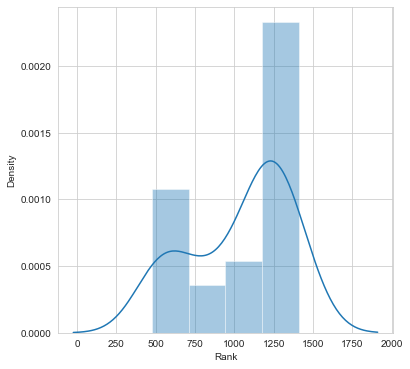

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(df_Turkey['Rank'])
plt.show()

In [25]:
!pip install sweetviz


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##  SweetViz Library
SweetViz Library is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA with just two lines of code. Output is a fully self-contained HTML application. The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

In [26]:
import pandas as pd
import sweetviz as sv

In [27]:
df = pd.read_csv("2023 QS World University Rankings.csv")
print("dataset loaded..")

dataset loaded..


                                             |                                             | [  0%]   00:00 ->…


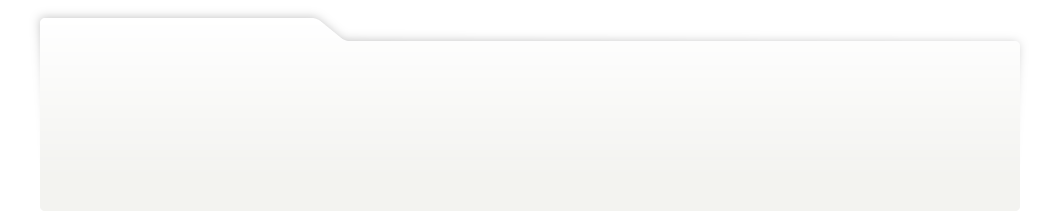
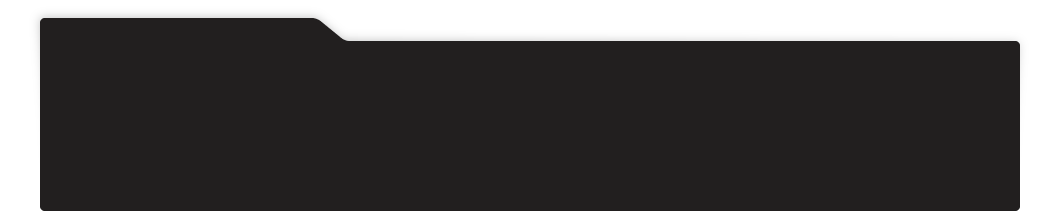
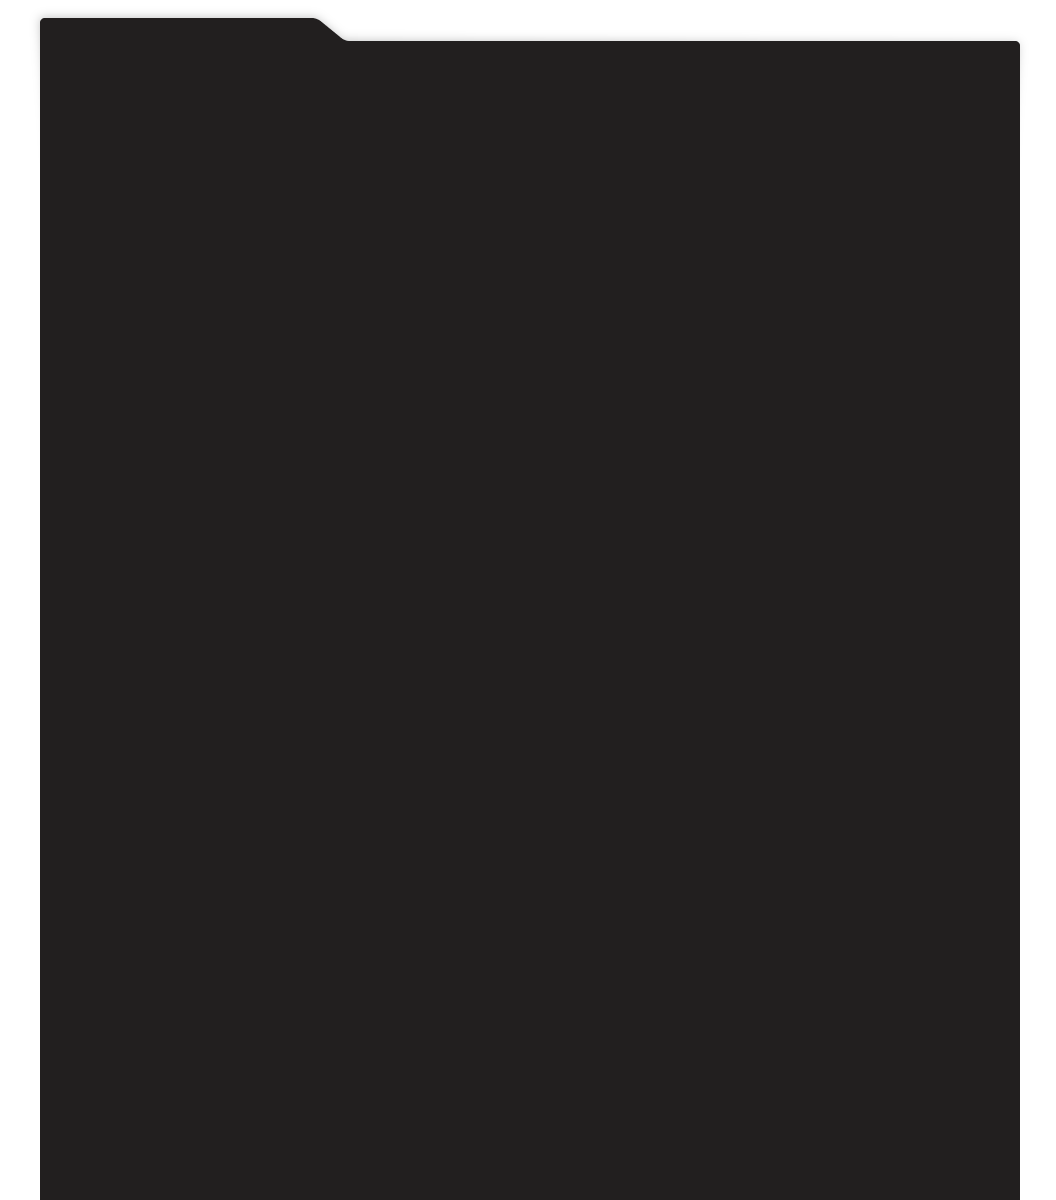
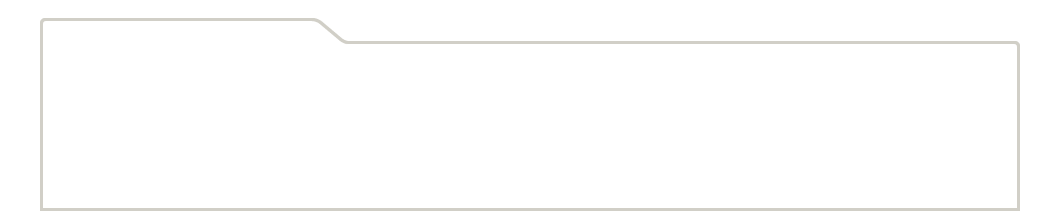
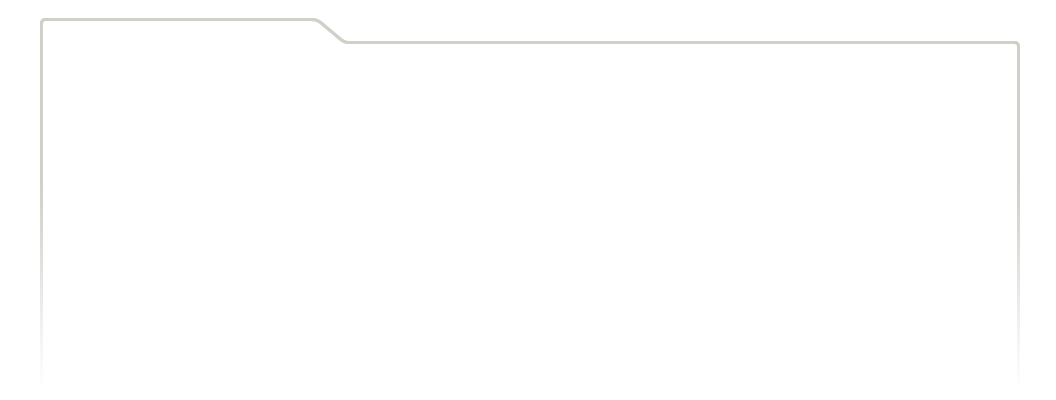
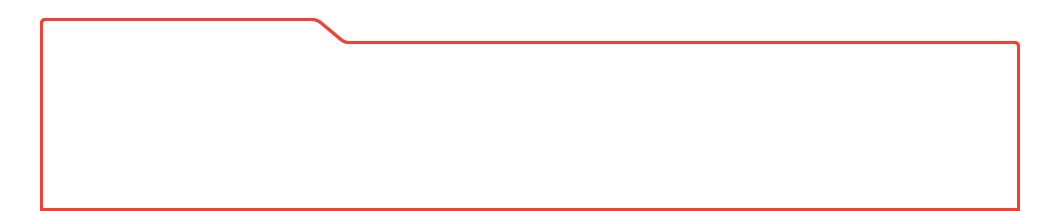
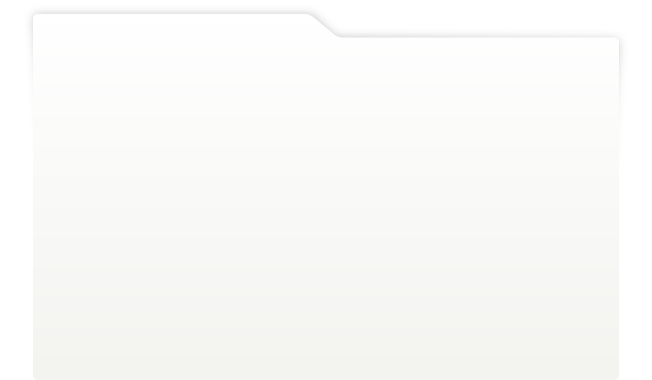
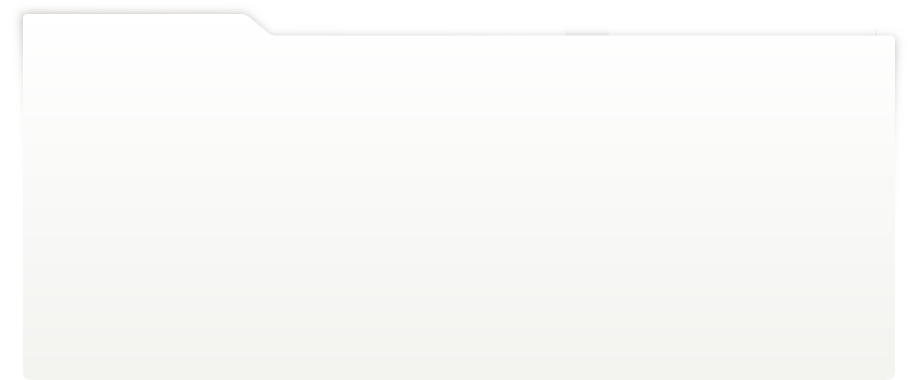
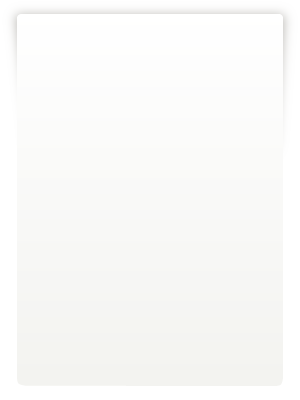
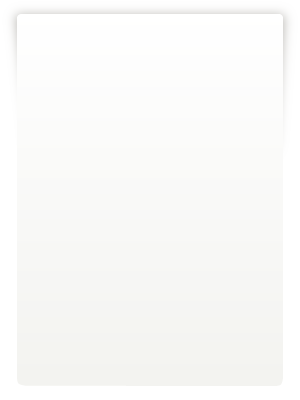
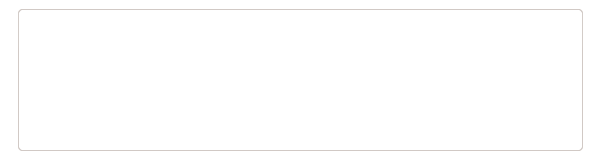
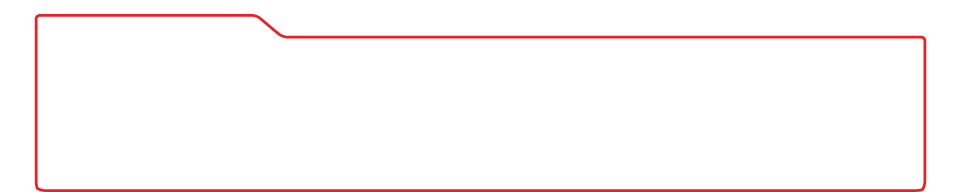
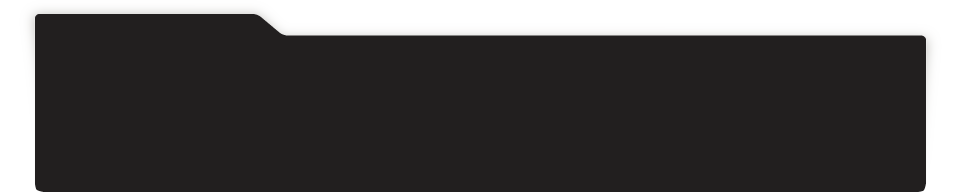
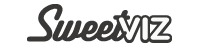
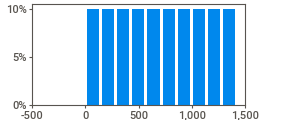
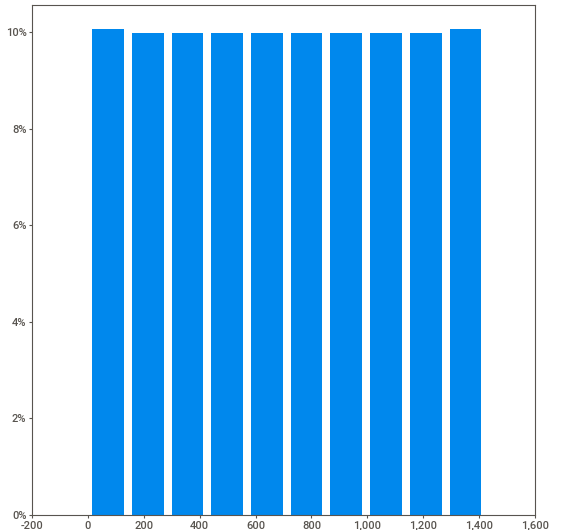
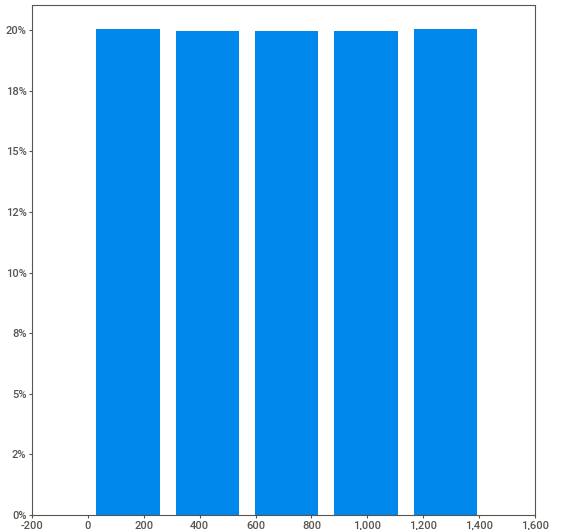
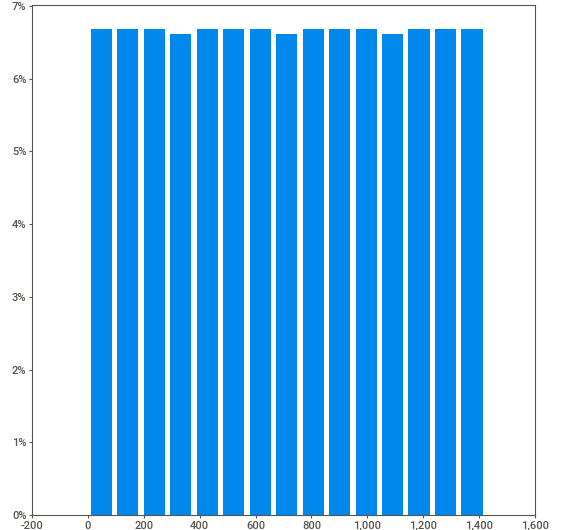
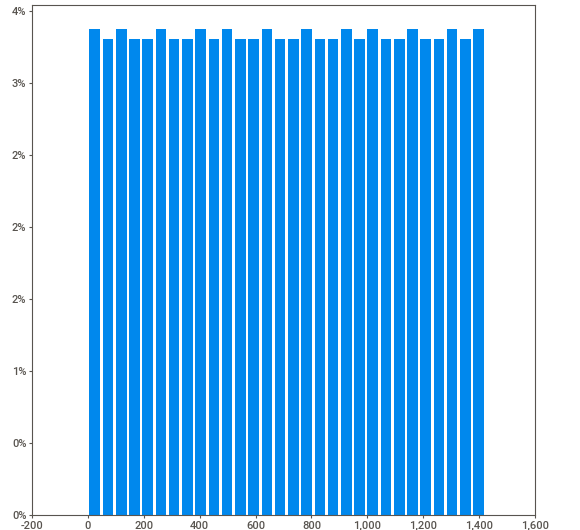
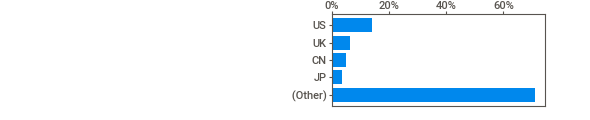
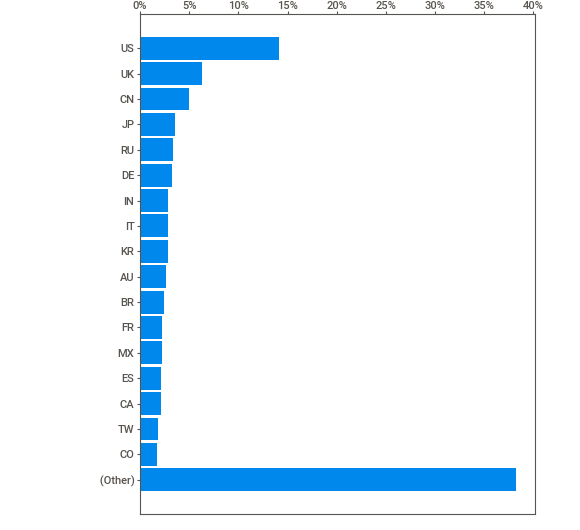
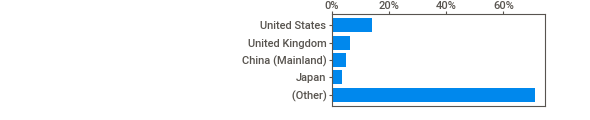
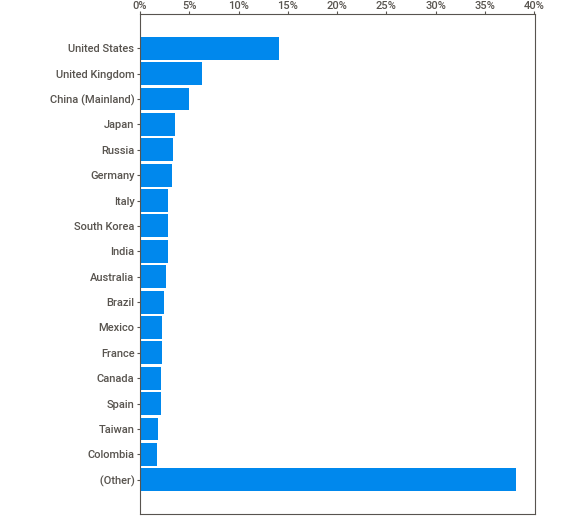
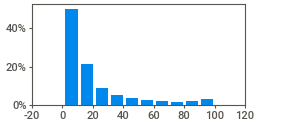
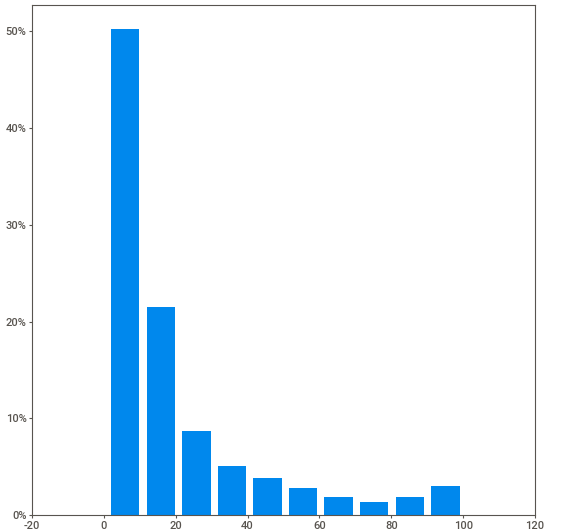
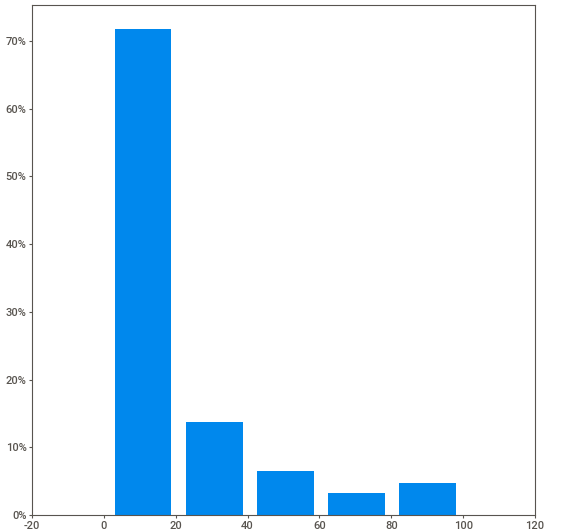
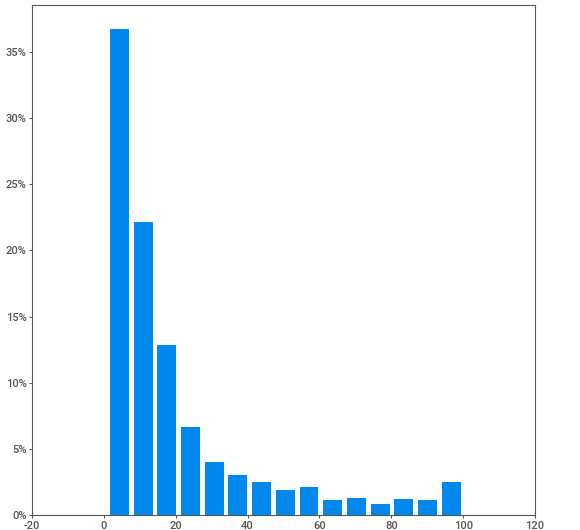
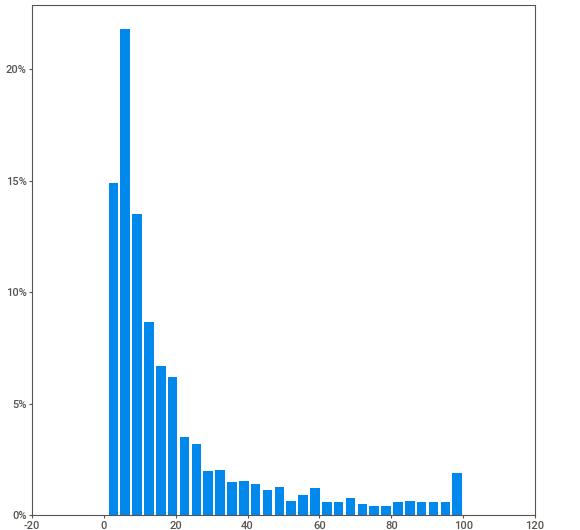
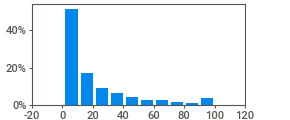
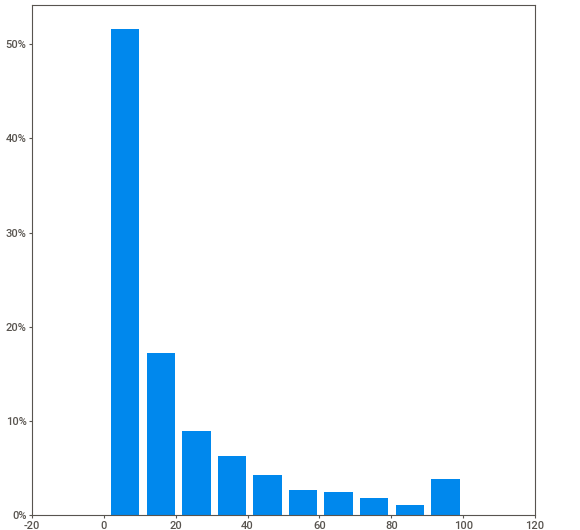
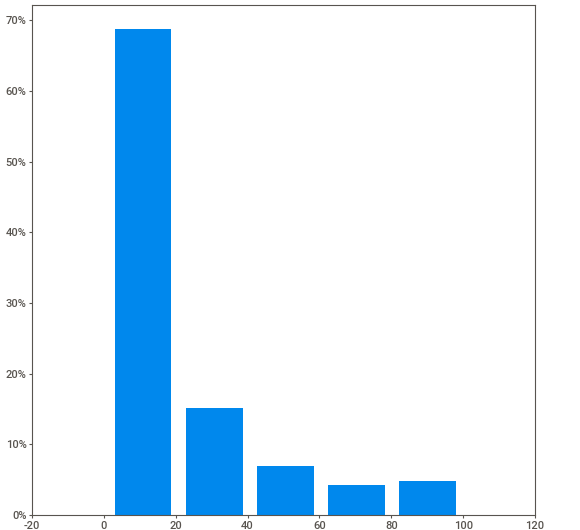
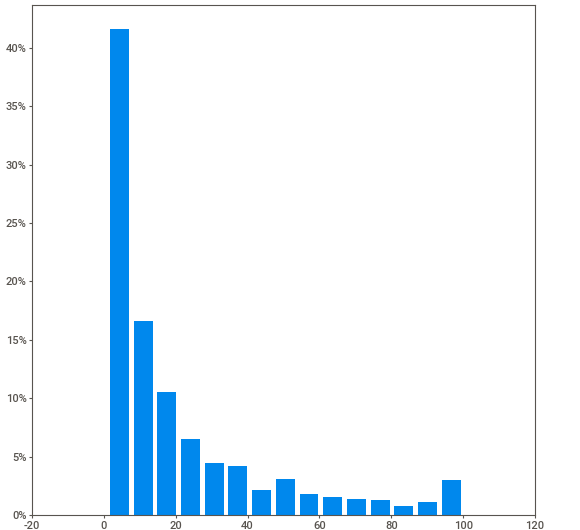
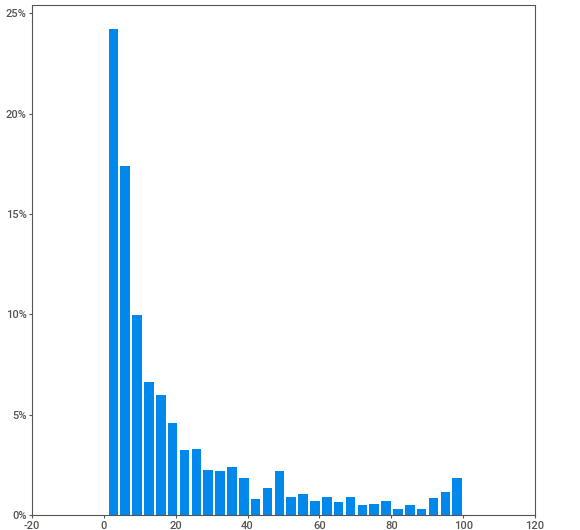
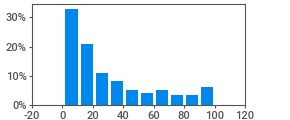
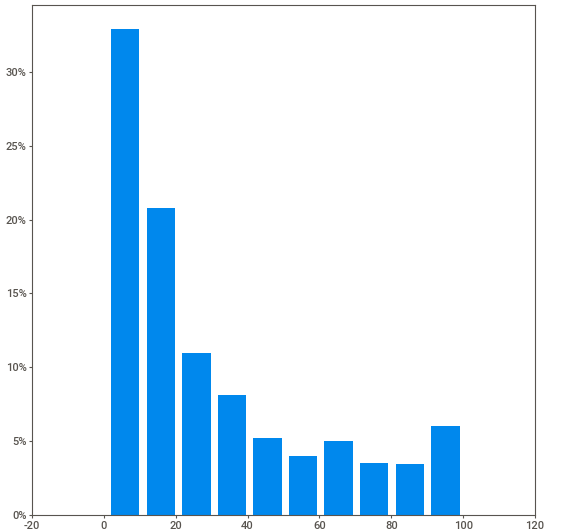
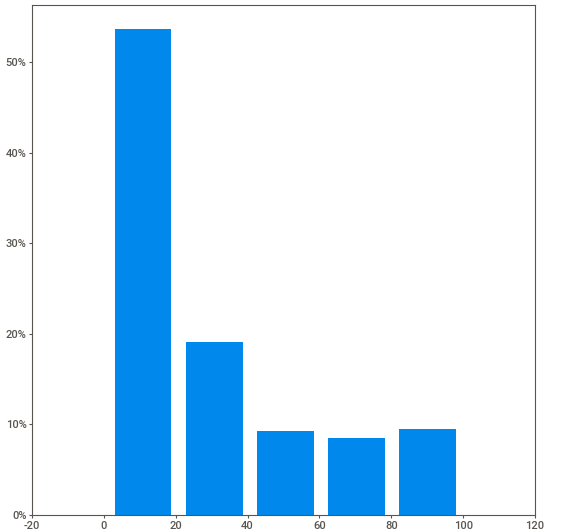
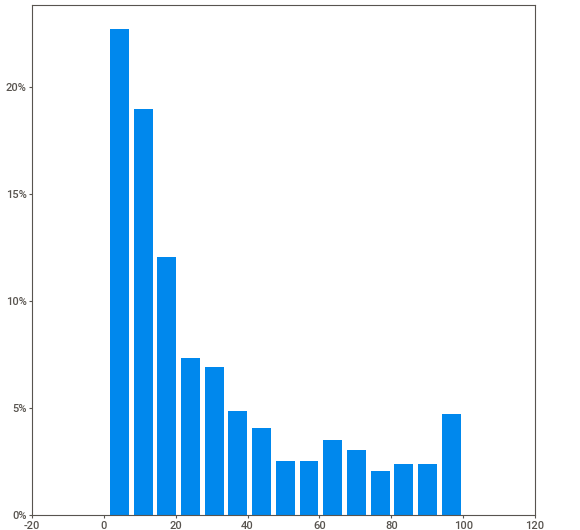
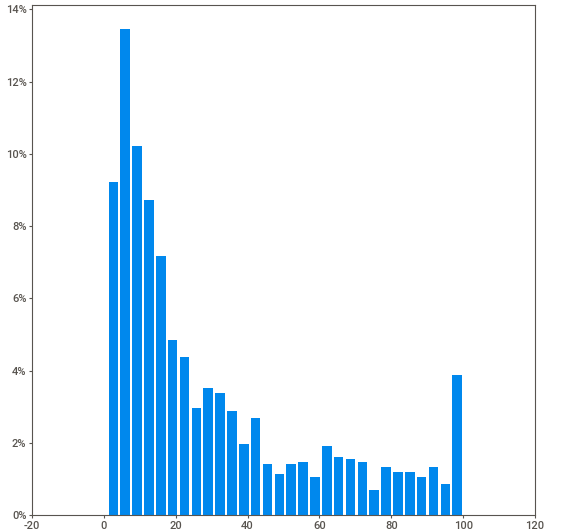
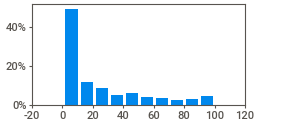
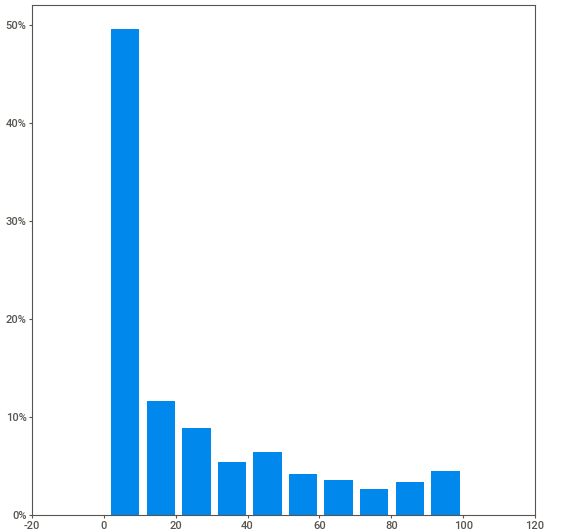
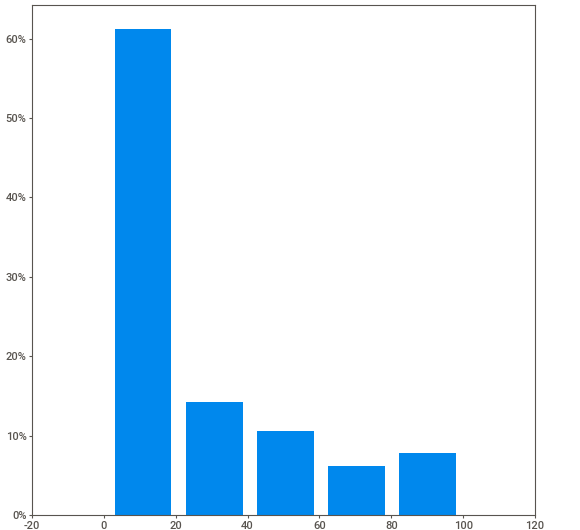
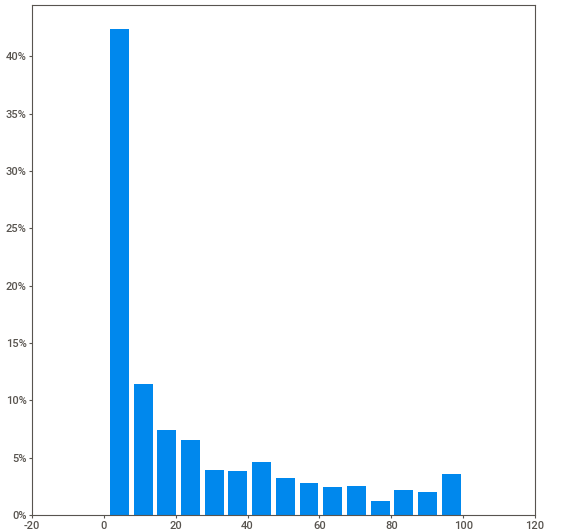
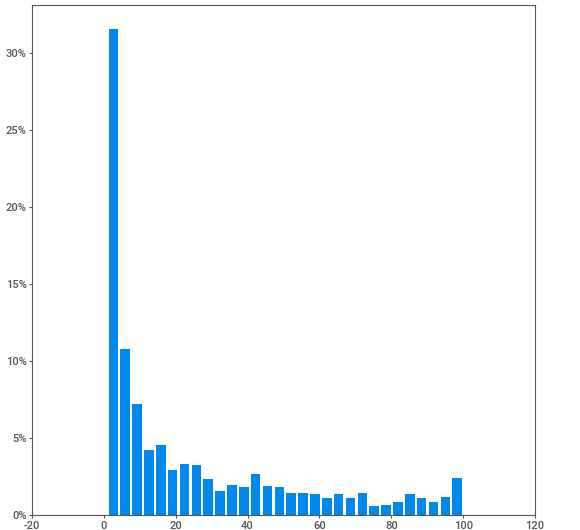
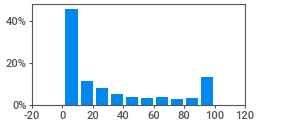
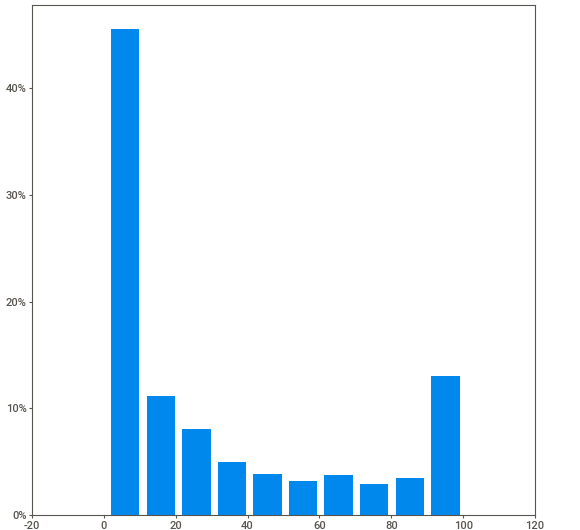
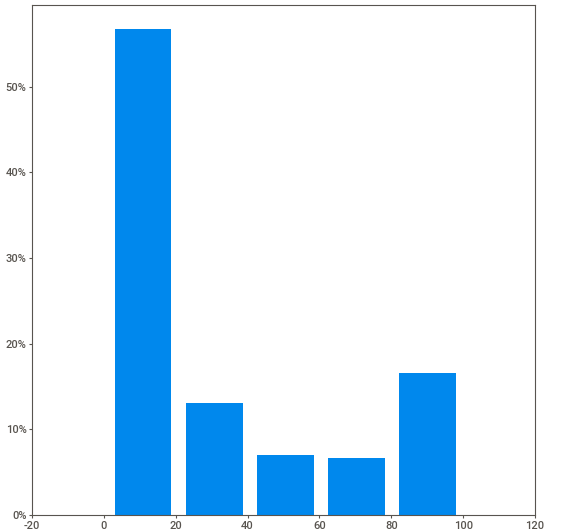
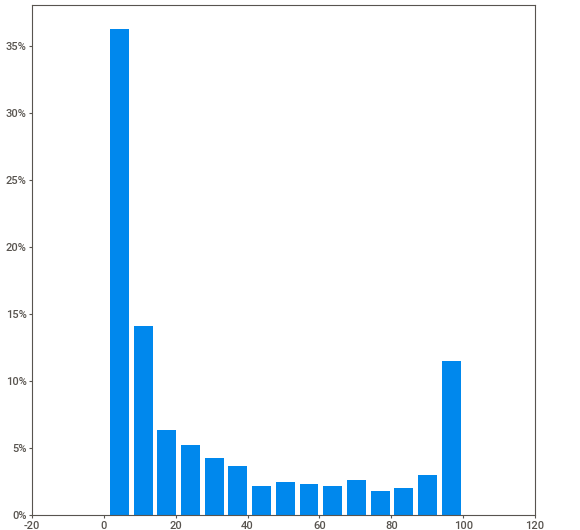
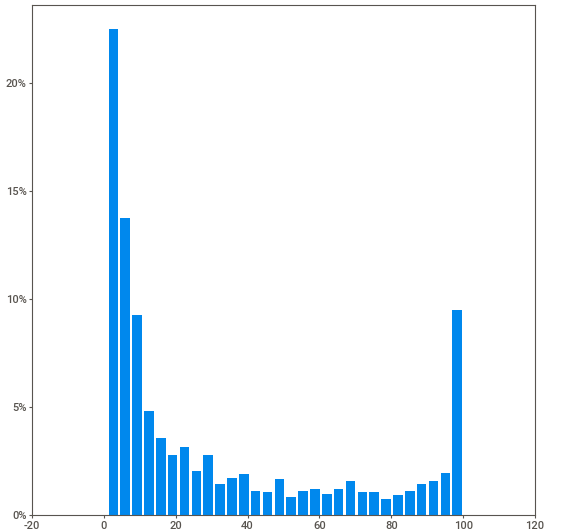
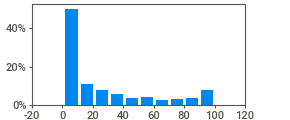
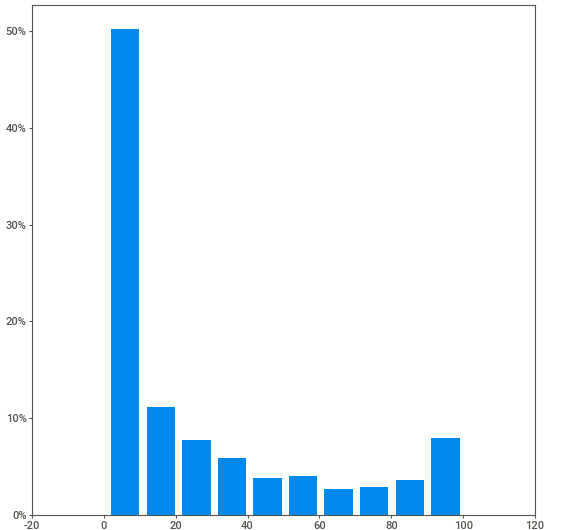
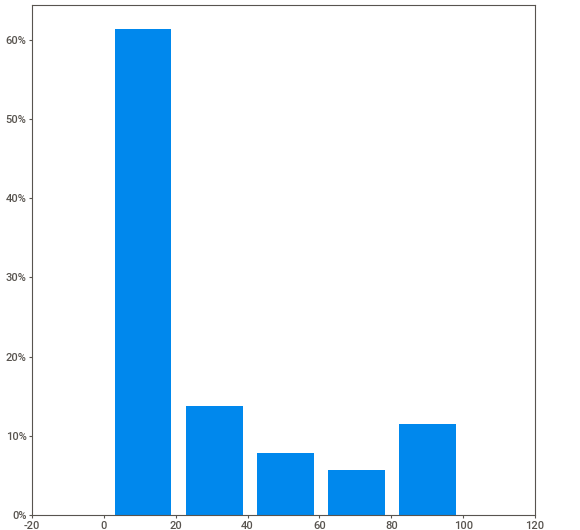
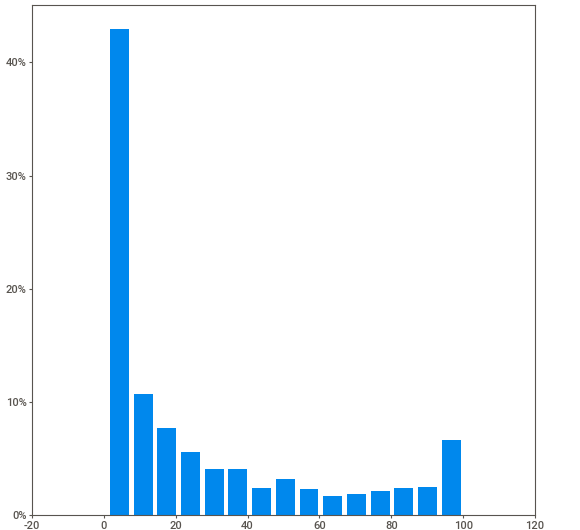
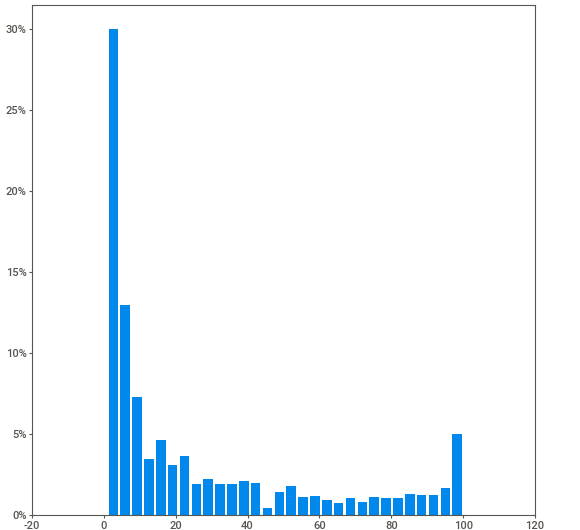
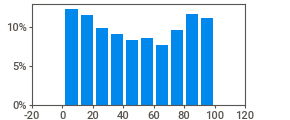
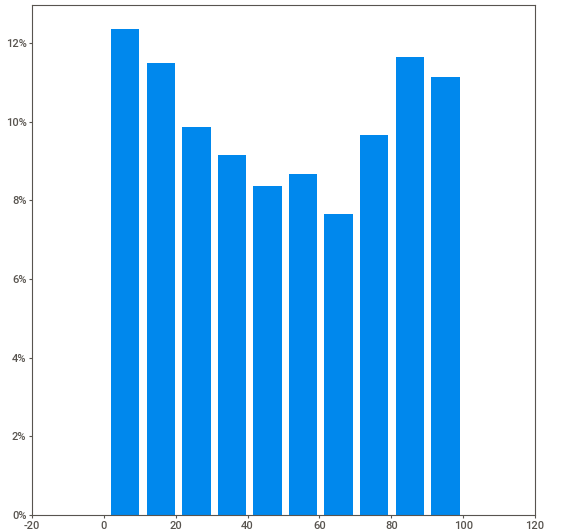
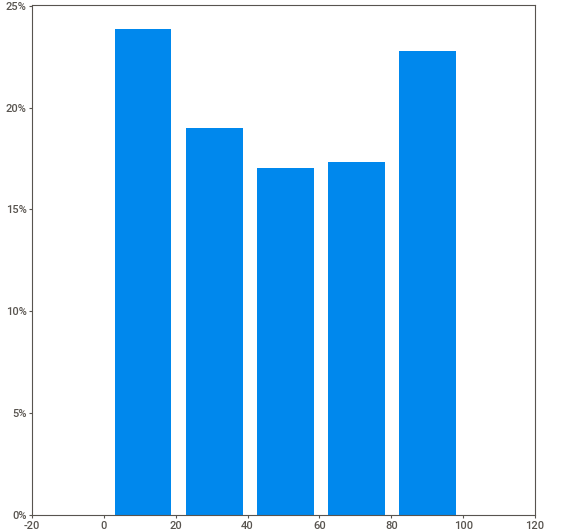
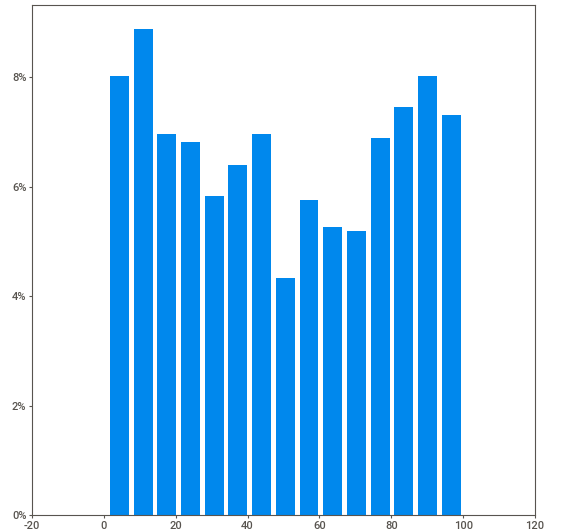
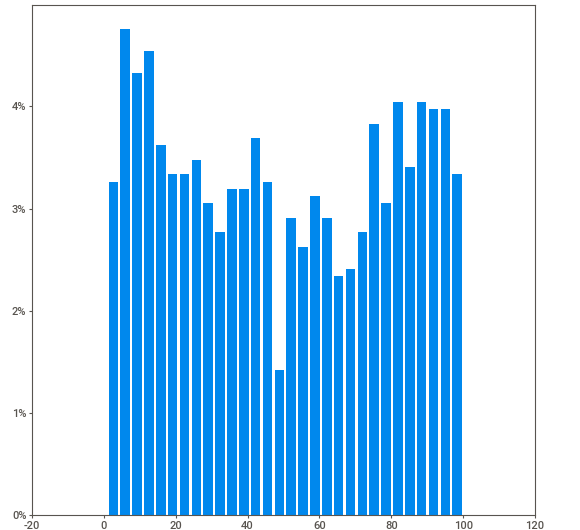
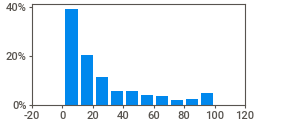
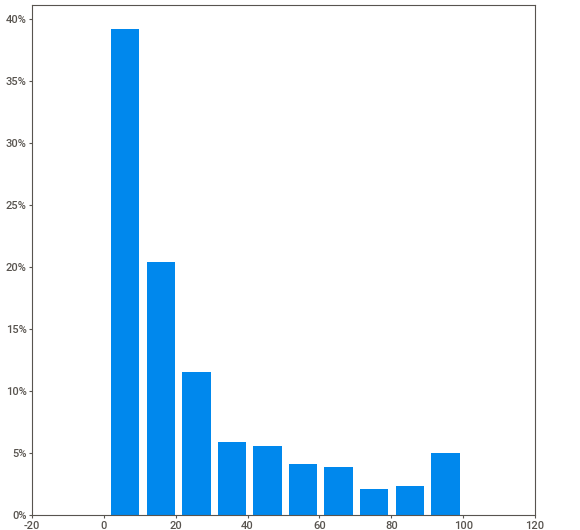
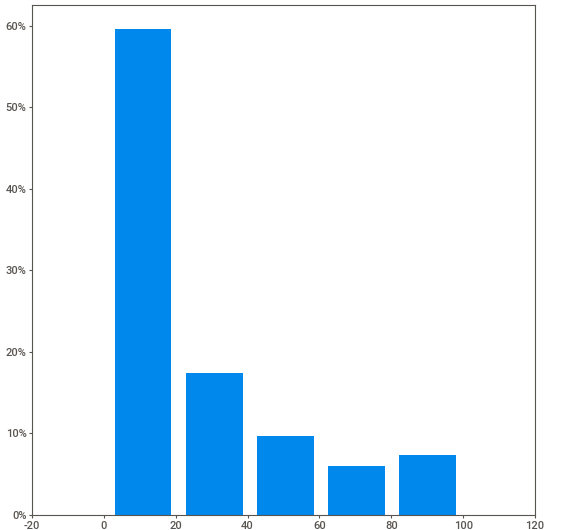
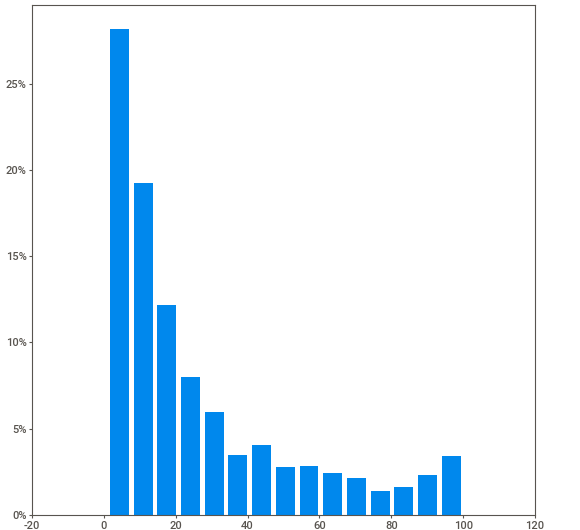
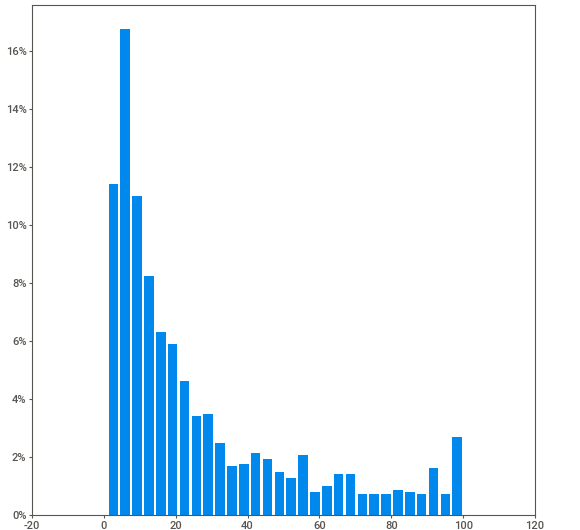
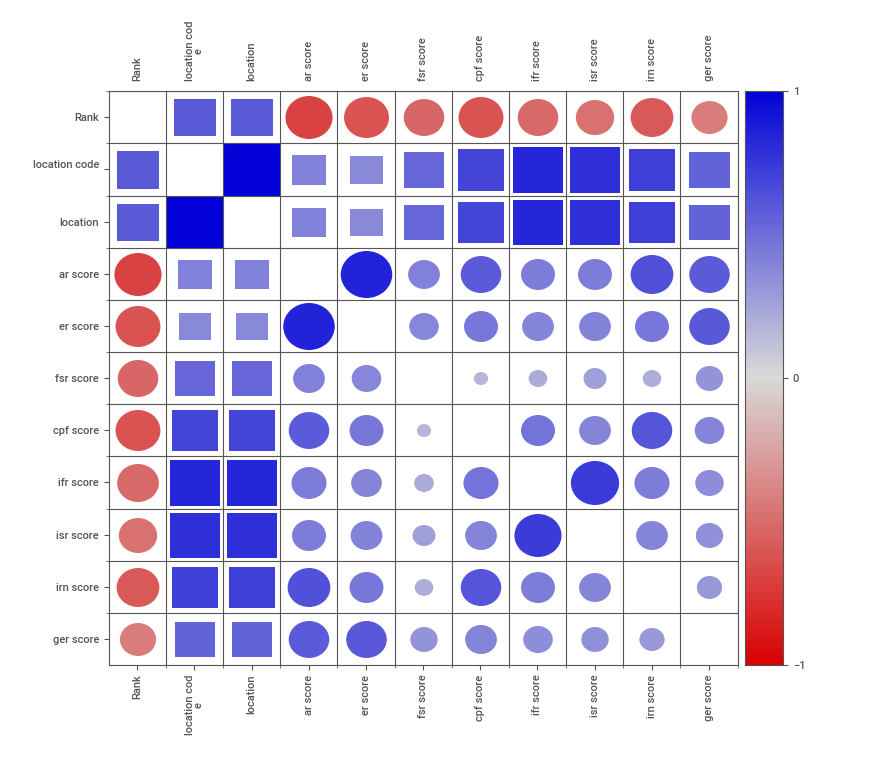
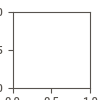

In [28]:
my_report = sv.analyze(df)
my_report.show_notebook(w="100%", h="full")

In [29]:
# copy selected columns from Data 2017-2022
df_temp2023 = df[['institution','Rank','ar score','location']].copy()

In [30]:
pd.DataFrame(df_temp2023.isnull().sum(), columns=['Number of Missing values'])

Number of Missing values
institution                         0
Rank                                0
ar score                            0
location                            0

In [31]:
df['location'].unique()

array(['United States', 'United Kingdom', 'Switzerland', 'Singapore',
       'China (Mainland)', 'Hong Kong SAR', 'Japan', 'France',
       'South Korea', 'Australia', 'Canada', 'Germany', 'Netherlands',
       'Argentina', 'Malaysia', 'Russia', 'Belgium', 'Taiwan', 'Denmark',
       'New Zealand', 'Sweden', 'Ireland', 'Norway', 'Mexico',
       'Saudi Arabia', 'Finland', 'Brazil', 'Chile', 'Italy',
       'Kazakhstan', 'Austria', 'India', 'Spain', 'United Arab Emirates',
       'Qatar', 'Colombia', 'Israel', 'Thailand', 'Indonesia',
       'South Africa', 'Lebanon', 'Brunei', 'Portugal', 'Poland',
       'Belarus', 'Czech Republic', 'Estonia', 'Macau SAR', 'Pakistan',
       'Peru', 'Iran, Islamic Republic of', 'Oman', 'Lithuania',
       'Philippines', 'Egypt', 'Greece', 'Uruguay', 'Cuba', 'Cyprus',
       'Turkey', 'Costa Rica', 'Ukraine', 'Hungary', 'Bahrain',
       'Bulgaria', 'Jordan', 'Georgia', 'Slovenia', 'Slovakia', 'Kuwait',
       'Venezuela', 'Ecuador', 'Latvia', 'Tunisia

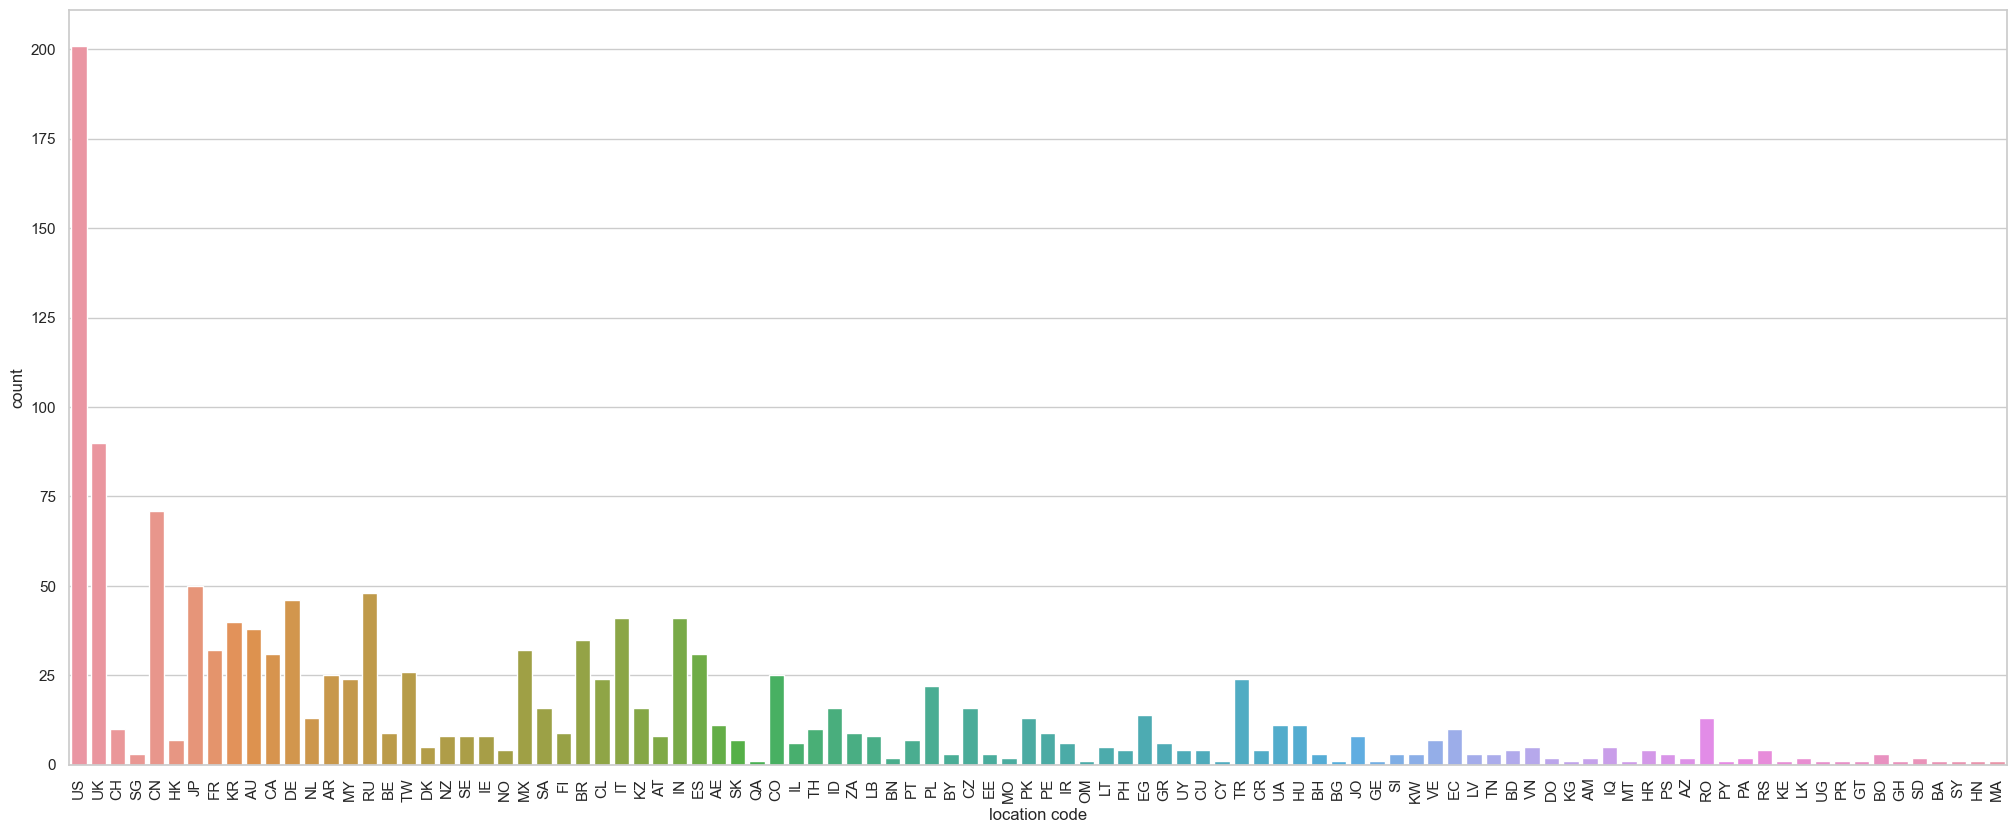

In [32]:
plt.figure(figsize=(25,10))
sns.set(style="whitegrid")
sns.countplot(x=df['location code'],data=df)
plt.xticks(rotation=90)
plt.show()

In [33]:
df.columns

Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')

In [34]:
print(df_Turkey['er score'].max())
print(df_Turkey['fsr score'].max())
print(df_Turkey['cpf score'].max())
print(df_Turkey['ifr score'].max())
print(df_Turkey['irn score'].max())
print(df_Turkey['ar score'].max())
print(df_Turkey['ger score'].max())
print(df_Turkey['isr score'].max())
print(df_Turkey['score scaled'].max())

52.7
37.0
25.0
64.2
72.8
26.8
70.6
53.0
24.9


In [35]:
df_erS = df_Turkey[(df_Turkey['er score'] >= 49)]
df_erS

Rank                       institution location code location  ar score  \
504   505  Middle East Technical University            TR   Turkey      26.8   
609   610     Istanbul Technical University            TR   Turkey      21.9   

    ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
504     318      52.7     157        8.5     601+  ...       492      10.7   
609     377      49.1     180       15.0     601+  ...      601+       4.8   

     ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
504      601+      14.7      601+      58.5       585      30.1       415   
609      601+      18.9       553      66.7       496      25.0       489   

    score scaled  
504            -  
609            -  

[2 rows x 21 columns]

In [36]:
df_fsr = df_Turkey[(df_Turkey['fsr score'] >= 15)]
df_fsr

Rank                    institution location code location  ar score  \
477    478                 Koç University            TR   Turkey      20.4   
535    536             Sabanci University            TR   Turkey      16.2   
565    566             Bilkent University            TR   Turkey      20.2   
609    610  Istanbul Technical University            TR   Turkey      21.9   
1209  1210             Anadolu University            TR   Turkey       3.2   
1238  1239    Istanbul Bilgi Üniversitesi            TR   Turkey       3.5   

     ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
477      411      36.3     265       31.2      497  ...       511      30.3   
535     501+      27.4     350       37.0      420  ...       580      40.5   
565      417      34.1     287       16.2     601+  ...      601+      64.2   
609      377      49.1     180       15.0     601+  ...      601+       4.8   
1209    501+       4.7    501+       15.5     601+  ...      601+       2.0   
1238    501+       5.3    501+       16.0     601+  ...      601+       7.0   

      ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
477        472      10.6      601+      42.6      601+      24.0       507   
535        402      17.0       582      24.3      601+      46.9       269   
565        288       8.9      601+      31.7      601+      37.3       349   
609       601+      18.9       553      66.7       496      25.0       489   
1209      601+       3.5      601+      15.6      601+       9.1      601+   
1238      601+      24.8       471       7.0      601+      18.3      601+   

     score scaled  
477          24.9  
535             -  
565             -  
609             -  
1209            -  
1238            -  

[6 rows x 21 columns]

In [37]:
df_cpf = df_Turkey[(df_Turkey['cpf score'] >= 25)]
df_cpf

Rank                       institution location code location  ar score  \
504   505  Middle East Technical University            TR   Turkey      26.8   

    ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
504     318      52.7     157        8.5     601+  ...       492      10.7   

     ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
504      601+      14.7      601+      58.5       585      30.1       415   

    score scaled  
504            -  

[1 rows x 21 columns]

In [38]:
df_erS = df_Turkey[(df_Turkey['ifr score'] >=64.2)]
df_erS

Rank         institution location code location  ar score ar rank  \
565   566  Bilkent University            TR   Turkey      20.2     417   

     er score er rank  fsr score fsr rank  ...  cpf rank ifr score  ifr rank  \
565      34.1     287       16.2     601+  ...      601+      64.2       288   

    isr score  isr rank irn score  irn rank ger score  ger rank score scaled  
565       8.9      601+      31.7      601+      37.3       349            -  

[1 rows x 21 columns]

In [39]:
df_erS = df_Turkey[(df_Turkey['irn score'] >=66)]
df_erS

Rank                    institution location code location  ar score  \
609   610  Istanbul Technical University            TR   Turkey      21.9   
837   838          Hacettepe University             TR   Turkey      18.0   
844   845            Istanbul University            TR   Turkey      24.6   

    ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
609     377      49.1     180       15.0     601+  ...      601+       4.8   
837     480      18.8     483        8.6     601+  ...      601+       3.1   
844     345      15.2    501+        3.1     601+  ...      601+       9.2   

     ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
609      601+      18.9       553      66.7       496      25.0       489   
837      601+       2.7      601+      72.8       426      15.2      601+   
844      601+      17.6       569      68.3       475      29.5       427   

    score scaled  
609            -  
837            -  
844            -  

[3 rows x 21 columns]

In [40]:
df_ger = df_Turkey[(df_Turkey['ger score'] >= 70.6)]
df_ger

Rank          institution location code location  ar score ar rank  \
704   705  Boğaziçi University            TR   Turkey      21.0     398   

     er score er rank  fsr score fsr rank  ...  cpf rank ifr score  ifr rank  \
704      47.1     200        4.4     601+  ...      601+      12.3      601+   

    isr score  isr rank irn score  irn rank ger score  ger rank score scaled  
704       2.9      601+      39.0      601+      70.6       134            -  

[1 rows x 21 columns]

In [41]:
df_ar = df_Turkey[(df_Turkey['ar score'] >= 26.8)]
df_ar

Rank                       institution location code location  ar score  \
504   505  Middle East Technical University            TR   Turkey      26.8   

    ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
504     318      52.7     157        8.5     601+  ...       492      10.7   

     ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
504      601+      14.7      601+      58.5       585      30.1       415   

    score scaled  
504            -  

[1 rows x 21 columns]

In [42]:
df_isr = df_Turkey[(df_Turkey['isr score'] >= 53)]
df_isr

Rank                  institution location code location  ar score  \
1053  1054  Istanbul Aydin University              TR   Turkey       3.1   

     ar rank  er score er rank  fsr score fsr rank  ...  cpf rank ifr score  \
1053    501+       2.9    501+       13.3     601+  ...      601+      10.5   

      ifr rank isr score  isr rank irn score  irn rank ger score  ger rank  \
1053      601+      53.0       270       4.3      601+       9.8      601+   

     score scaled  
1053            -  

[1 rows x 21 columns]

In [43]:
df = df.dropna()

In [44]:
X = df.drop(['score scaled', 'institution'], axis=1)


In [45]:
y = df['Rank']


In [46]:
X = pd.get_dummies(X, drop_first=True)


In [49]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=13)


In [50]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape 


((1042, 4647), (261, 4647), (1042,), (261,))

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [52]:
GBR.fit(X_train,y_train)
y_pred_gbr =GBR.predict(X_test)

In [53]:
(mean_squared_error(y_test,  y_pred_gbr)) ** 0.5


3.523749441186684

In [54]:
r2_score(  y_pred_gbr,y_test)


0.9999291018721108